In [3]:
from openfast_io.FAST_reader import InputReader_OpenFAST
from openfast_io.FAST_writer import InputWriter_OpenFAST
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [4]:
# UA data from Gergios
csv = """t/c,A1,A2,b1,b2,Tf,Tp,MSE
0.211,0.165,0.235,0.0155,0.25,7.5,4.0,0.004
0.241,0.165,0.235,0.0155,0.25,3.3,4.1,0.001
0.270,0.165,0.235,0.0155,0.25,3.0,4.5,0.023"""

airfoil_dist_csv = """loc,Airfoil Locations,t/c
0,circular,1
0.02, circular,1
0.15, SNL-FFA-W3-500,0.5
0.245170317, FFA-W3-360,0.36
0.328843951, FFA-W3-330blend,0.33
0.439179346, FFA-W3-301,0.301
0.537671407, FFA-W3-270blend,0.27
0.638207657, FFA-W3-241,0.241
0.771743852, FFA-W3-211,0.211
1, FFA-W3-211,0.211"""

# Read the CSV data
UAdata = pd.read_csv(StringIO(csv))
airfoil_dist = pd.read_csv(StringIO(airfoil_dist_csv))
print(UAdata)
print('')
print(airfoil_dist)

     t/c     A1     A2      b1    b2   Tf   Tp    MSE
0  0.211  0.165  0.235  0.0155  0.25  7.5  4.0  0.004
1  0.241  0.165  0.235  0.0155  0.25  3.3  4.1  0.001
2  0.270  0.165  0.235  0.0155  0.25  3.0  4.5  0.023

        loc Airfoil Locations    t/c
0  0.000000          circular  1.000
1  0.020000          circular  1.000
2  0.150000    SNL-FFA-W3-500  0.500
3  0.245170        FFA-W3-360  0.360
4  0.328844   FFA-W3-330blend  0.330
5  0.439179        FFA-W3-301  0.301
6  0.537671   FFA-W3-270blend  0.270
7  0.638208        FFA-W3-241  0.241
8  0.771744        FFA-W3-211  0.211
9  1.000000        FFA-W3-211  0.211


In [5]:
# reading in the AD blade file
reader = InputReader_OpenFAST()
reader.FAST_InputFile = 'IEA-15-240-RWT-LandBased.fst'
reader.FAST_directory = '../openfast_model'
reader.execute()
print(reader.fst_vt['AeroDynBlade'].keys())

dict_keys(['NumBlNds', 'BlSpn', 'BlCrvAC', 'BlSwpAC', 'BlCrvAng', 'BlTwist', 'BlChord', 'BlAFID', 'BlCb', 'BlCenBn', 'BlCenBt'])


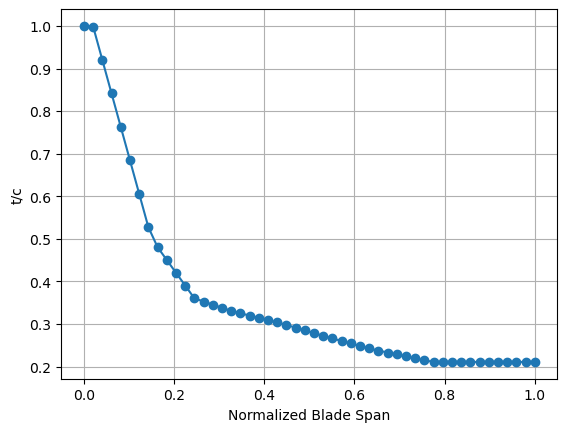

In [7]:
# Distribution of t/c along the blade
nd_ad_locs = np.array(reader.fst_vt['AeroDynBlade']['BlSpn']) / float(reader.fst_vt['AeroDynBlade']['BlSpn'][-1])
AD_blade_tc = np.interp(nd_ad_locs, airfoil_dist['loc'], airfoil_dist['t/c'])

fig = plt.figure()
plt.plot(nd_ad_locs, AD_blade_tc, 'o-')
plt.xlabel('Normalized Blade Span')
plt.ylabel('t/c')
plt.grid()
plt.show()

In [12]:
# Interpolating the UA data using t/c, but only between t/c of 0.211 and 0.270
# creating a df similar to the UA data
UAdata_interp = pd.DataFrame()
UAdata_interp['loc'] = nd_ad_locs
UAdata_interp['t/c'] = AD_blade_tc
UAdata_interp['A1'] = np.interp(AD_blade_tc, UAdata['t/c'], UAdata['A1'])
UAdata_interp['A2'] = np.interp(AD_blade_tc, UAdata['t/c'], UAdata['A2'])
UAdata_interp['b1'] = np.interp(AD_blade_tc, UAdata['t/c'], UAdata['b1'])
UAdata_interp['b2'] = np.interp(AD_blade_tc, UAdata['t/c'], UAdata['b2'])
UAdata_interp['Tf'] = np.interp(AD_blade_tc, UAdata['t/c'], UAdata['Tf'])
UAdata_interp['Tp'] = np.interp(AD_blade_tc, UAdata['t/c'], UAdata['Tp'])
print(UAdata_interp)


         loc       t/c     A1     A2      b1    b2        Tf        Tp
0   0.000000  1.000000  0.165  0.235  0.0155  0.25  3.000000  4.500000
1   0.020408  0.998430  0.165  0.235  0.0155  0.25  3.000000  4.500000
2   0.040816  0.919937  0.165  0.235  0.0155  0.25  3.000000  4.500000
3   0.061224  0.841444  0.165  0.235  0.0155  0.25  3.000000  4.500000
4   0.081633  0.762951  0.165  0.235  0.0155  0.25  3.000000  4.500000
5   0.102041  0.684458  0.165  0.235  0.0155  0.25  3.000000  4.500000
6   0.122449  0.605965  0.165  0.235  0.0155  0.25  3.000000  4.500000
7   0.142857  0.527473  0.165  0.235  0.0155  0.25  3.000000  4.500000
8   0.163265  0.480486  0.165  0.235  0.0155  0.25  3.000000  4.500000
9   0.183673  0.450465  0.165  0.235  0.0155  0.25  3.000000  4.500000
10  0.204082  0.420443  0.165  0.235  0.0155  0.25  3.000000  4.500000
11  0.224490  0.390422  0.165  0.235  0.0155  0.25  3.000000  4.500000
12  0.244898  0.360401  0.165  0.235  0.0155  0.25  3.000000  4.500000
13  0.

Text(0.5, 1.0, 'Tp')

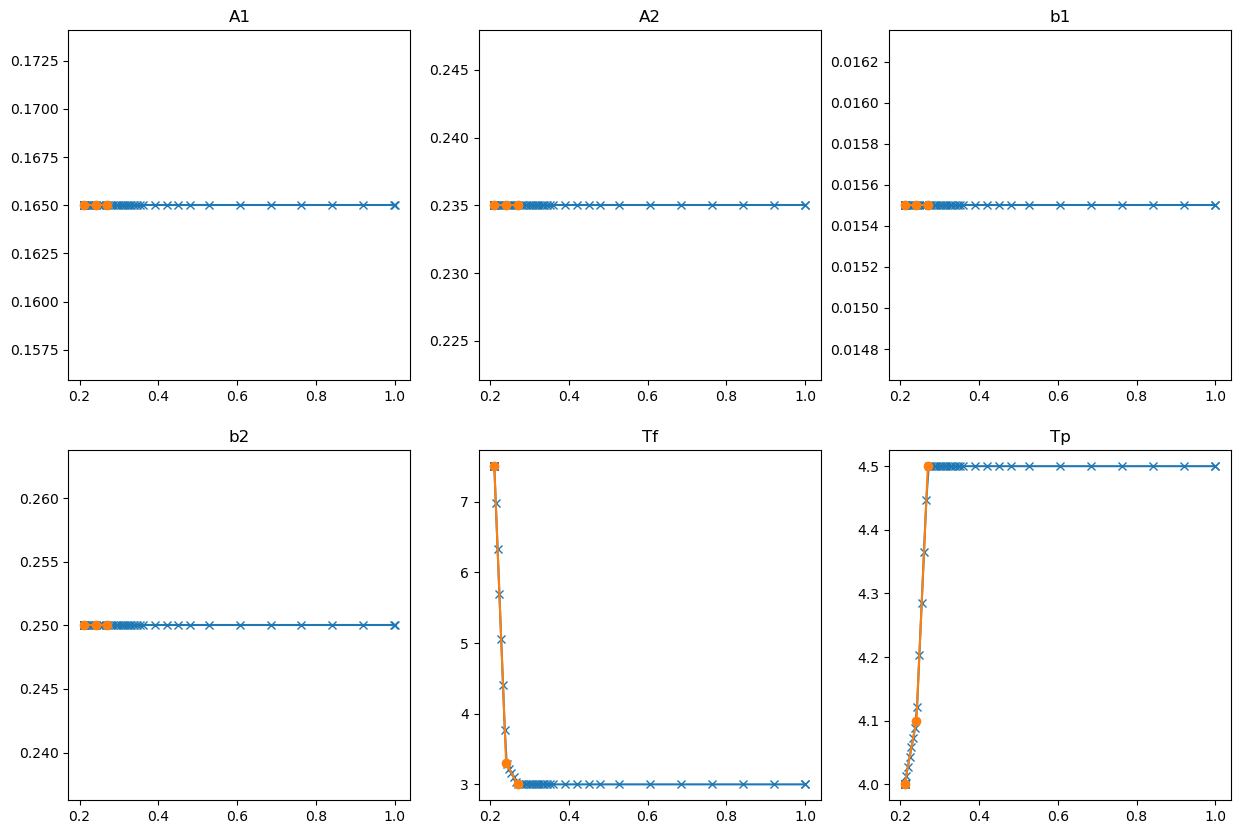

In [31]:
# Plotting just to see the interpolation
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].plot(AD_blade_tc, UAdata_interp['A1'], 'x-')
axs[0, 0].plot(UAdata['t/c'], UAdata['A1'], 'o-')
axs[0, 0].set_title('A1')

axs[0, 1].plot(AD_blade_tc, UAdata_interp['A2'], 'x-')
axs[0, 1].plot(UAdata['t/c'], UAdata['A2'], 'o-')
axs[0, 1].set_title('A2')

axs[0, 2].plot(AD_blade_tc, UAdata_interp['b1'], 'x-')
axs[0, 2].plot(UAdata['t/c'], UAdata['b1'], 'o-')
axs[0, 2].set_title('b1')

axs[1, 0].plot(AD_blade_tc, UAdata_interp['b2'], 'x-')
axs[1, 0].plot(UAdata['t/c'], UAdata['b2'], 'o-')
axs[1, 0].set_title('b2')

axs[1, 1].plot(AD_blade_tc, UAdata_interp['Tf'], 'x-')
axs[1, 1].plot(UAdata['t/c'], UAdata['Tf'], 'o-')
axs[1, 1].set_title('Tf')

axs[1, 2].plot(AD_blade_tc, UAdata_interp['Tp'], 'x-')
axs[1, 2].plot(UAdata['t/c'], UAdata['Tp'], 'o-')
axs[1, 2].set_title('Tp')



In [39]:
# now we assign this to the airfoils and then write them out
for i in range(len(reader.fst_vt['AeroDyn']['af_data'])):

    # we assign only if t/c is larger between 0.211 and 0.270
    if UAdata_interp.iloc[i]['t/c'] >= 0.211 and UAdata_interp.iloc[i]['t/c'] <= 0.270:
        print('Assigning updated UA data to airfoil ', i)
        reader.fst_vt['AeroDyn']['af_data'][i][0]['A1'] = UAdata_interp.iloc[i]['A1']
        reader.fst_vt['AeroDyn']['af_data'][i][0]['A2'] = UAdata_interp.iloc[i]['A2']
        reader.fst_vt['AeroDyn']['af_data'][i][0]['b1'] = UAdata_interp.iloc[i]['b1']
        reader.fst_vt['AeroDyn']['af_data'][i][0]['b2'] = UAdata_interp.iloc[i]['b2']
        reader.fst_vt['AeroDyn']['af_data'][i][0]['Tf'] = UAdata_interp.iloc[i]['Tf']
        reader.fst_vt['AeroDyn']['af_data'][i][0]['Tp'] = UAdata_interp.iloc[i]['Tp']



Assigning updated UA data to airfoil  27
Assigning updated UA data to airfoil  28
Assigning updated UA data to airfoil  29
Assigning updated UA data to airfoil  30
Assigning updated UA data to airfoil  31
Assigning updated UA data to airfoil  32
Assigning updated UA data to airfoil  33
Assigning updated UA data to airfoil  34
Assigning updated UA data to airfoil  35
Assigning updated UA data to airfoil  36
Assigning updated UA data to airfoil  37
Assigning updated UA data to airfoil  38
Assigning updated UA data to airfoil  39
Assigning updated UA data to airfoil  40
Assigning updated UA data to airfoil  41
Assigning updated UA data to airfoil  42
Assigning updated UA data to airfoil  43
Assigning updated UA data to airfoil  44
Assigning updated UA data to airfoil  45
Assigning updated UA data to airfoil  46
Assigning updated UA data to airfoil  47
Assigning updated UA data to airfoil  48
Assigning updated UA data to airfoil  49


In [ ]:
# writing the new airfoil files
writer = InputWriter_OpenFAST()
writer.fst_vt = reader.fst_vt
writer.FAST_namingOut = 'IEA-15-240-RWT.fst'
writer.FAST_runDirectory = '../openfast_model_UAupdated'
writer.write_AeroDynPolar()